# $$Health ~Analytics: Acidente~Vascular~ Cerebral(AVC)$$

**Health Analytics** é a coleta e tratamento de dados gerados por pacientes, hospitais e órgãos públicos de saúde, a partir do momento em que esses dados são analisados, permitem que insights sejam gerados por cientistas de dados, analistas, matemáticos e profissionais especializados. Esses insights auxiliam empresas, corretoras e operadoras de saúde a oferecer soluções sob medida, que evitam desperdícios de recursos e oferecem diferencial competitivo


**O Acidente Vascular Cerebral(AVC)**, ou derrame cerebral, ocorre quando há um entupimento ou o rompimento dos vasos que levam sangue ao cérebro provocando a paralisia da área cerebral que ficou sem circulação sanguínea adequada.

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$  

## $$Verificar~as~variáveis~mais~relevantes~para~uma~pessoa~reduzir~a~chance~de~sofre~AVC$$

In [3]:
#Carregar os pacotes
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Base de Dados 

In [4]:
# Carrega o dataset
dados = pd.read_csv("Stroke.csv",sep=',')
dados

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Dataset contém 5.110 registros e 12 variáveis.**

# Dicionário de Dados



### $$Variáveis:$$

- **id:** Código de identificação de cada paciente.


- **gender:** O gênero do paciente, podendo assumir 3 valores: Masculino, Feminino e Outros
    
    
- **age:** Idade do Paciente


- **hypertension:** Dados binários indicando a presença ou não de hipertensão.
    
    
- **heart_disease:** Dados binários indicando a presença ou não de doenças do coração


- **ever_married:** Dados binários indicando se o paciente já foi casado em algum momento da vida. 


- **work_type:** Tipo de trabalho realizado pelo paciente.


- **Residence_type:** Dados binário indicando se o paciente mora em residência rural ou urbana


- **avg_glucose_level:** Nível de glicose média no sangue.


- **bmi:** Índice de massa corporal (IMC)


- **smoking_status:** 4 categorias que classifica os pacientes em relação ao fumo


- **stroke:** Informa se o participante já teve ou não AVC.



# Análise Exploratória

In [5]:
#Vamos excluir a variável ID pois ela é inrrelavante para nosso objetivo
dados = dados.drop('id',axis=1)


In [6]:
# Tipos de dados das colunas
dados.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

**Temos que transformar os dados de acordo com as características de cada variável**

In [7]:
# Verificar se existe valores nulos
dados.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**A coluna 'bmi' possui 201 dados incompletos, após a análise exploratória vamos verificar se essa variável é relevante para o modelo, caso seja, vamos ter que excluir os dados faltantes**

In [8]:
#Verificar se existe dados duplicados
sum(dados.duplicated())

0

In [9]:
# Verifica o total de valores únicos por coluna
dados.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

**Analisandos os valores únicos, pela quantidade de classes, podemos concluir que temos 3 variáveis numéricas ('age','avg_glucose_level','bmi'), e 8 variáveis categóricas**

In [10]:
#Transformações dos dados categoricos em dummys
dados_transform = pd.get_dummies(dados,prefix=['gender'], columns = ['gender'])
dados_transform = pd.get_dummies(dados_transform,prefix=['hypertension'], columns = ['hypertension'])
dados_transform = pd.get_dummies(dados_transform,prefix=['heart_disease'], columns = ['heart_disease'])
dados_transform = pd.get_dummies(dados_transform,prefix=['ever_married'], columns = ['ever_married'])
dados_transform = pd.get_dummies(dados_transform,prefix=['work_type'], columns = ['work_type'])
dados_transform = pd.get_dummies(dados_transform,prefix=['Residence_type'], columns = ['Residence_type'])
dados_transform = pd.get_dummies(dados_transform,prefix=['smoking_status'], columns = ['smoking_status'])


dados_transform

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,202.21,NaN,1,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,105.92,32.5,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,171.23,34.4,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,174.12,24.0,1,1,0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,83.75,NaN,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,125.20,40.0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,82.99,30.6,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,166.29,25.6,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


**Transformamos as variáveis categóricas em dummys para não cometer ponderação arbitraria durante a modelagem dos dados**

In [11]:
# Tipos de dados das colunas
dados_transform.dtypes

age                               float64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
hypertension_0                      uint8
hypertension_1                      uint8
heart_disease_0                     uint8
heart_disease_1                     uint8
ever_married_No                     uint8
ever_married_Yes                    uint8
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type_Rural                uint8
Residence_type_Urban                uint8
smoking_status_Unknown              uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes             

In [12]:
#Shape 
dados_transform.shape

(5110, 24)

**Observe que após a transformação dos dados passamos de 12 variáveis para 24**

## Análise da variável Target:

## **stroke**

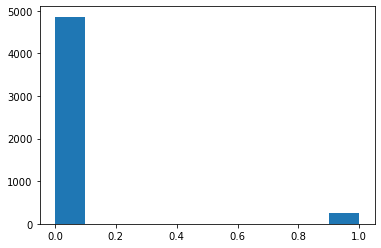

In [13]:
#Plot
plt.hist(dados_transform.stroke);

In [14]:
#Porcentagem dos dados 
a = len(dados_transform[dados_transform.stroke==0])
b = len(dados_transform[dados_transform.stroke==1])
total = len(dados_transform)

print(f'Porcentagem de Paciente que já tiveram AVC: {round(b/total*100,2)}')
print(f'Porcentagem de Paciente que não tiveram AVC: {round(a/total*100,2)}')

Porcentagem de Paciente que já tiveram AVC: 4.87
Porcentagem de Paciente que não tiveram AVC: 95.13


**Temos um problema com a distribuições das classes, esse desbalanceamento faz com que não tenhamos tanta precisão nas previsões dos dados em uma das classes, vamos ter que usar a técnica de sub amostragem para equilibrar os dados**

## Análise dos dados categóricos X Target

**Vamos considerar como média as porcentagens nas análises de 95% para classe 0 e 5% para classe 1, acima de 5% da classe 1 é considerado significante para aumentar a chance do paciente contrair AVC**

## gender

In [15]:
#Porcentagem das categorias em relação a variável Target
pd.crosstab(dados.stroke,dados.gender)

gender,Female,Male,Other
stroke,,,
0,2853,2007,1
1,141,108,0


**Temos apenas 1 dados da classe 'Other', vamos excluir esse dado**

In [16]:
#Exlcuir a classe 'Other'
dados = dados[dados.gender!='Other']
gen = pd.crosstab(dados.stroke,dados.gender)
gen/gen.aggregate(np.sum)

gender,Female,Male
stroke,,
0,0.952906,0.948936
1,0.047094,0.051064


**Não tem diferença estatística entre Homens e Mulheres**

## hypertension

In [17]:
#Porcentagem das categorias em relação a variável Target
hyp = pd.crosstab(dados.stroke,dados.hypertension)
hyp/hyp.aggregate(np.sum)

hypertension,0,1
stroke,,
0,0.960312,0.86747
1,0.039688,0.13253


**Há diferença significativa quando um paciente é hipertenso com a chance de contrair um AVC**

## heart_disease

In [18]:
#Porcentagem das categorias em relação a variável Target
heart = pd.crosstab(dados.stroke,dados.heart_disease)
heart/heart.aggregate(np.sum)

heart_disease,0,1
stroke,,
0,0.958204,0.82971
1,0.041796,0.17029


**Há diferença significativa quando um paciente tem doença no coração com a chance de contrair um AVC**

## ever_married

In [19]:
#Porcentagem das categorias em relação a variável Target
marr = pd.crosstab(dados.stroke,dados.ever_married)
marr/marr.aggregate(np.sum)

ever_married,No,Yes
stroke,,
0,0.983485,0.934387
1,0.016515,0.065613


**Há diferença estatística quando o paciente já foi casado em algum momento da vida em relação a chance de ter um AVC**

## work_type

In [20]:
#Porcentagem das categorias em relação a variável Target
work = pd.crosstab(dados.stroke,dados.work_type)
work/work.aggregate(np.sum)

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,0.949772,1.0,0.949042,0.920635,0.997089
1,0.050228,0.0,0.050958,0.079365,0.002911


**Se o paciente não trabalha ou trabalha com crianças, diminui consideravelmente o risco de ter um AVC em relação aos outros tipos de trabalho**

## Residence_type

In [21]:
#Porcentagem das categorias em relação a variável Target
resid = pd.crosstab(dados.stroke,dados.Residence_type)
resid/resid.aggregate(np.sum)

Residence_type,Rural,Urban
stroke,,
0,0.954636,0.947997
1,0.045364,0.052003


**Não há diferença estatística para comprovar que quem reside na área urbana ou rural tem mais chance de ter AVC**

## smoking_status

In [22]:
#Porcentagem das categorias em relação a variável Target
smoking = pd.crosstab(dados.stroke,dados.smoking_status)
smoking/smoking.aggregate(np.sum)

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,0.96956,0.920814,0.952431,0.946768
1,0.03044,0.079186,0.047569,0.053232


**OBS: A classe 'Unknown' não é relevante para essa variável**

In [23]:
#Exlcuir a classe 'Unknown'
dados = dados[dados.smoking_status!='Unknown']


smoking = pd.crosstab(dados.stroke,dados.smoking_status)
smoking/smoking.aggregate(np.sum)

smoking_status,formerly smoked,never smoked,smokes
stroke,,,
0,0.920814,0.952431,0.946768
1,0.079186,0.047569,0.053232


**Pacientes que já fumaram tem uma pequena diferença estatística em relação aos outros pacientes para sofrer AVC, porém para ter uma precisão maior no resultado teríamos que ter o tempo que o paciente fuma ou já fumou durante sua vida**

## Análise dos dados Numéricos X Target

**Vamos adotar o mesmo critério que nos dados categóricos para considerar as variáveis relevantes para o paciente sofre AVC**

## age

In [24]:
#classe 0
stroke0 = dados.loc[(dados['stroke']==0)]
a = stroke0['age'].mean()

#Classe 1
stroke1 = dados.loc[(dados['stroke']==1)]
b = stroke1['age'].mean()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 1 = {round(b,2)}')

Classe 0 = 47.7
Classe 1 = 68.17


**Há diferença estatística quando o paciente é mais velho para sofre um AVC**

## avg_glucose_level

In [25]:
#classe 0
stroke0 = dados.loc[(dados['stroke']==0)]
a = stroke0['avg_glucose_level'].mean()

#Classe 1
stroke1 = dados.loc[(dados['stroke']==1)]
b = stroke1['avg_glucose_level'].mean()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 1 = {round(b,2)}')

Classe 0 = 107.45
Classe 1 = 134.34


**Há diferença estatística quando o paciente tem um nível de glicose mais alto no sangue, pois ele tem mais chance de sofre um AVC**

## bmi

In [26]:
#classe 0
stroke0 = dados.loc[(dados['stroke']==0)]
a = stroke0['bmi'].mean()

#Classe 1
stroke1 = dados.loc[(dados['stroke']==1)]
b = stroke1['bmi'].mean()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 1 = {round(b,2)}')

Classe 0 = 30.27
Classe 1 = 30.65


**Não há diferença estatística com o índice de massa corporal**

## Conclusão da análise exploratória:

**Podemos concluir depois da análise exploratória, que as variáveis: 'avg_glucose_level,
'age','ever_married', 'work_type', 'smoking_status','heart_disease' e 'hypertension' mostra estatisticamente significância em relação a chance de sofre um AVC.**



## Selecionar as variáveis mais relevantes

In [27]:
dados_relev = dados[['avg_glucose_level','age','ever_married', 'work_type', 'smoking_status','heart_disease','hypertension']]
dados_relev

,avg_glucose_level,age,ever_married,work_type,smoking_status,heart_disease,hypertension
0,228.69,67.0,Yes,Private,formerly smoked,1,0
1,202.21,61.0,Yes,Self-employed,never smoked,0,0
2,105.92,80.0,Yes,Private,never smoked,1,0
3,171.23,49.0,Yes,Private,smokes,0,0
4,174.12,79.0,Yes,Self-employed,never smoked,0,1
...,...,...,...,...,...,...,...
5102,77.93,57.0,Yes,Private,never smoked,0,0
5105,83.75,80.0,Yes,Private,never smoked,0,1
5106,125.20,81.0,Yes,Self-employed,never smoked,0,0
5107,82.99,35.0,Yes,Self-employed,never smoked,0,0


# Conclusão 1

**Para o objetivo principal, o projeto terminaria aqui, pois selecionamos as variáveis mais relevantes para um paciente reduzir as chances de sofre um AVC com esses dados coletados, porém para fins didáticos vamos usar as variáveis que demonstraram mais relevantes e usar algoritimos de ML para fazer previsões**

# Tratamento dos dados

In [28]:
#Transformações dos dados categoricos em dummys
dados_transform1 = pd.get_dummies(dados_relev,prefix=['ever_married'], columns = ['ever_married'])
dados_transform1 = pd.get_dummies(dados_transform1,prefix=['work_type'], columns = ['work_type'])
dados_transform1 = pd.get_dummies(dados_transform1,prefix=['smoking_status'], columns = ['smoking_status'])



dados_transform1

,avg_glucose_level,age,heart_disease,hypertension,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,228.69,67.0,1,0,0,1,0,0,1,0,0,1,0,0
1,202.21,61.0,0,0,0,1,0,0,0,1,0,0,1,0
2,105.92,80.0,1,0,0,1,0,0,1,0,0,0,1,0
3,171.23,49.0,0,0,0,1,0,0,1,0,0,0,0,1
4,174.12,79.0,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,77.93,57.0,0,0,0,1,0,0,1,0,0,0,1,0
5105,83.75,80.0,0,1,0,1,0,0,1,0,0,0,1,0
5106,125.20,81.0,0,0,0,1,0,0,0,1,0,0,1,0
5107,82.99,35.0,0,0,0,1,0,0,0,1,0,0,1,0


**Transformamos as variáveis categóricas em dummys para não cometer ponderação arbitraria durante a modelagem dos dados**

In [29]:
#Verificar valores unicos após a transformações dos dados
dados_transform1.nunique()

avg_glucose_level                 3000
age                                 73
heart_disease                        2
hypertension                         2
ever_married_No                      2
ever_married_Yes                     2
work_type_Govt_job                   2
work_type_Never_worked               2
work_type_Private                    2
work_type_Self-employed              2
work_type_children                   2
smoking_status_formerly smoked       2
smoking_status_never smoked          2
smoking_status_smokes                2
dtype: int64

In [30]:
# Verificar se existe valores nulos
dados_transform1.isnull().sum()

avg_glucose_level                 0
age                               0
heart_disease                     0
hypertension                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [31]:
#Verificar se existe dados duplicados
sum(dados_transform1.duplicated())

0

**Dataset não contém dados nulos e duplicados**

# Modelagem

- A probabilidade de uma pessoa sofre AVC é de 5% nesse conjunto de dados, o objetivo da modelagem é ter a maior porcentagem possível no recall nos casos de AVC, pois o erro nesse indicador é o mais grave, ele diz que o paciente nunca teve AVC mas na verdade já teve

In [32]:
#Separar as variáveis X e Y
x = dados_transform1
y = dados.stroke


In [33]:
# Classe de referência pra o modelo de regressão logistica
x_ref = x.drop(['ever_married_No','work_type_children','smoking_status_never smoked'],axis=1)
x_ref.head(5)

,avg_glucose_level,age,heart_disease,hypertension,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_smokes
0,228.69,67.0,1,0,1,0,0,1,0,1,0
1,202.21,61.0,0,0,1,0,0,0,1,0,0
2,105.92,80.0,1,0,1,0,0,1,0,0,0
3,171.23,49.0,0,0,1,0,0,1,0,0,1
4,174.12,79.0,0,1,1,0,0,0,1,0,0


**No modelo de regressão logistica, temos que deixar uma das classes das variáveis dummys como referência**

In [34]:
#Separar os dados em treino e testes
from sklearn.model_selection import train_test_split
X_treino,X_teste,Y_treino,Y_teste=train_test_split(x_ref,y,test_size=0.3,random_state=1)

# Smote

- Técnicas padrão de ML, como Árvore de Decisão e Regressão Logística, têm um viés para a classe majoritária e tendem a ignorar a classe minoritária. Eles tendem apenas a prever a classe majoritária


- O balanceamento das classes é feito através do algoritimo Smote, ele equilibra as classes para que o aprendizado seja igual para ambas as classes

In [35]:
#Aplicar o Smote

x_smote = X_treino
y_smote = Y_treino

smt = SMOTE()
x_smote, y_smote = smt.fit_resample(x_smote, y_smote)
print(f'Dados de treino classe 0: {len(y_smote[y_smote==0])}')
print(f'Dados de treino classe 1: {len(y_smote[y_smote==1])}')

print(f'\nDados de teste classe 0: {len(Y_teste[Y_teste==0])}')
print(f'Dados de teste classe 1: {len(Y_teste[Y_teste==1])}')



Dados de treino classe 0: 2355
Dados de treino classe 1: 2355

Dados de teste classe 0: 1008
Dados de teste classe 1: 62


**Balanceamos os dados de treino aplicando a técnica de sobreamostragem**

## Modelo 1 - Regressão Logistica

In [60]:
#Criar e treinar o modelo de regressão logistica
import statsmodels.api as sm

x_interc_smote = sm.add_constant(x_smote) # Add o Intercept
modelo = sm.Logit(y_smote,x_interc_smote) # funçao com os 2 coeficientes,(Primeiro o y depois o x)
modelo_fit = modelo.fit() # Treinar o modelo
modelo_fit.summary() # Verificar os dados do modelo

         Current function value: 0.332908
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4710
Model:                          Logit   Df Residuals:                     4698
Method:                           MLE   Df Model:                           11
Date:                Fri, 10 Jun 2022   Pseudo R-squ.:                  0.5197
Time:                        17:44:17   Log-Likelihood:                -1568.0
converged:                      False   LL-Null:                       -3264.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.4427      0.249     -9.809      0.000      -2.931      -1.955
avg_glucose_level                  0.0069      0.001      8.594      0.000       0.005       0.009
age                                0.1011      0.004     27.207      0.000       0.094       0.108
heart_disease                     -1.0403      0.196     -5.312      0.000      -1.424      -0.656
hypertension                      -0.8240      0.137     -5.993      0.000      -1.093      -0.555
ever_married_Yes                  -0.2638      0.137     -1.925      0.054      -0.532       0.005
work_type_Govt_job                -6.0376      0.297    -20.307      0.000      -6.620      -5.455
work_type_Never_worked           -24.1420   5.89e+04     -0.000      1.000   -1.15e+05    1.15e+05
work_type_Private                 -3.7340      0.217    -17.229      0.000      -4.159      -3.309
work_type_Self-employed           -5.1136      0.245    -20.842      0.000      -5.595      -4.633
smoking_status_formerly smoked    -1.4529      0.121    -12.030      0.000      -1.690      -1.216
smoking_status_smokes             -0.7557      0.130     -5.831      0.000      -1.010      -0.502
==================================================================================================
"""

**Todas as variáveis tem significância estatística para o modelo de regressão logistica**

**OBS: Apesar da variável 'work_type_Never_worked' não ter significância estatística, as outras classes da sua categoria têm, isso faz com que ela permaneça no modelo**

<AxesSubplot:>

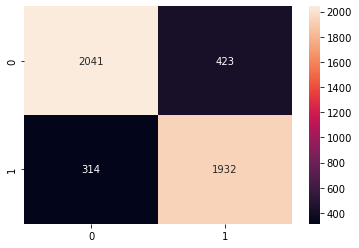

In [37]:
#Previsão dados de treino
pred_treino_RL =pd.DataFrame(modelo_fit.predict(x_interc_smote),columns=['Pred'])
pred_treino_RL['Pred'] = np.where(pred_treino_RL.iloc[:,0] >=0.5 , 1, 0)

#Matriz de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_treino_RL,y_smote)
sns.heatmap(cm,annot=True,fmt='d')

In [38]:
#Metricas dos dados de treino
from sklearn.metrics import classification_report
print(classification_report(pred_treino_RL,y_smote))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2464
           1       0.82      0.86      0.84      2246

    accuracy                           0.84      4710
   macro avg       0.84      0.84      0.84      4710
weighted avg       0.84      0.84      0.84      4710



<AxesSubplot:>

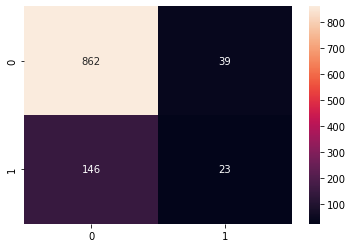

In [61]:
#Previsão dados de teste
x_interc_teste = sm.add_constant(X_teste) # Add o Intercept
pred_teste_RL =pd.DataFrame(modelo_fit.predict(x_interc_teste),columns=['Pred'])
pred_teste_RL['Pred'] = np.where(pred_teste_RL.iloc[:,0] >=0.5 , 1, 0)

#Matriz de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_teste_RL,Y_teste)
sns.heatmap(cm,annot=True,fmt='d')

In [40]:
#Metricas dos dados de teste
from sklearn.metrics import classification_report, recall_score
print(classification_report(pred_teste_RL,Y_teste))


              precision    recall  f1-score   support

           0       0.86      0.96      0.91       906
           1       0.40      0.15      0.22       164

    accuracy                           0.84      1070
   macro avg       0.63      0.56      0.56      1070
weighted avg       0.79      0.84      0.80      1070



In [41]:
#Recall
a = round(recall_score(pred_treino_RL,y_smote),2)
b = round(recall_score(pred_teste_RL,Y_teste),2)
c = [a,b]
recall = pd.DataFrame(c,columns=['R_Logistica'])

recall

,R_Logistica
0,0.86
1,0.15


**Note que a uma discrepância entre o valor do recall dos dados de treino e teste, mesmo balanceando os dados o algoritimo de regressão logistica não conseguiu uma boa performance**

# Modelo 2 - Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

#Separar os dados em treino e testes
X_treino,X_teste,Y_treino,Y_teste=train_test_split(x_ref,y,test_size=0.3,random_state=1)


# Construção do Classificador
random_forest = RandomForestClassifier(random_state=1) 

#Treinar o modelo com os dados de treino
modelo_random =  random_forest.fit(X_treino, Y_treino)

# Score do modelo
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo_random, X_treino, Y_treino)

# Média do score
mean = scores.mean();mean  

0.9402805611222446

<AxesSubplot:>

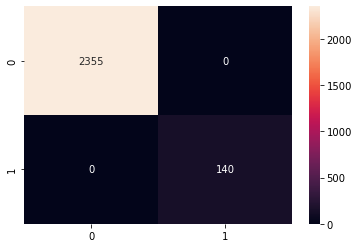

In [43]:
#Matriz de confusão dados de treino
pred_treino_RF = random_forest.predict(X_treino) 
cm = confusion_matrix(pred_treino_RF,Y_treino)
sns.heatmap(cm,annot=True,fmt='d')

In [44]:
#Metricas dos dados de treino
from sklearn.metrics import classification_report
print(classification_report(pred_treino_RF,Y_treino))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2355
           1       1.00      1.00      1.00       140

    accuracy                           1.00      2495
   macro avg       1.00      1.00      1.00      2495
weighted avg       1.00      1.00      1.00      2495



<AxesSubplot:>

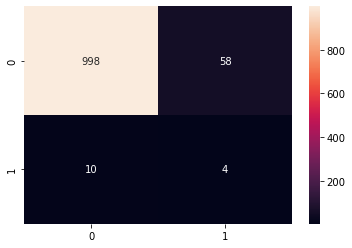

In [45]:
#Matriz de confusão dados de teste
pred_teste_RF = random_forest.predict(X_teste) 
cm = confusion_matrix(pred_teste_RF,Y_teste)
sns.heatmap(cm,annot=True,fmt='d')

In [46]:
#Metricas dos dados de teste
print(classification_report(pred_teste_RF,Y_teste))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1056
           1       0.06      0.29      0.11        14

    accuracy                           0.94      1070
   macro avg       0.53      0.62      0.54      1070
weighted avg       0.98      0.94      0.96      1070



In [47]:
#Recall
a = round(recall_score(pred_treino_RF,Y_treino),2)
b = round(recall_score(pred_teste_RF,Y_teste),2)
c = [a,b]
recall['R_Forest'] = c
recall

,R_Logistica,R_Forest
0,0.86,1.00
1,0.15,0.29


**Observe que o algoritimo Random Forest não comete nenhum erro com os dados de treino, mesmo sem balancear os dados, já com os dados de teste o algoritimo não performa bem, deixando evidente que a overfitting no modelo**

# Modelo 3 - Redes Neurais - MLPClassifier

In [48]:
from sklearn.neural_network import MLPClassifier

#Separar os dados em treino e testes

X_treino,X_teste,Y_treino,Y_teste=train_test_split(x_ref,y,test_size=0.3,random_state=1)


#Smote
smt = SMOTE()
x_smote, y_smote = smt.fit_resample(X_treino, Y_treino)



rede_neural1 = MLPClassifier(max_iter=1500, verbose=True, 
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (100,100),random_state=1)
rede_neural1.fit(X_treino, Y_treino)

Iteration 1, loss = 0.38609595
Iteration 2, loss = 0.28212011
Iteration 3, loss = 0.28207541
Iteration 4, loss = 0.29920946
Iteration 5, loss = 0.26458396
Iteration 6, loss = 0.25856717
Iteration 7, loss = 0.25374356
Iteration 8, loss = 0.25173718
Iteration 9, loss = 0.24367219
Iteration 10, loss = 0.24508092
Iteration 11, loss = 0.23929214
Iteration 12, loss = 0.25430654
Iteration 13, loss = 0.26182688
Iteration 14, loss = 0.24563365
Iteration 15, loss = 0.23187486
Iteration 16, loss = 0.23452406
Iteration 17, loss = 0.22755493
Iteration 18, loss = 0.22436823
Iteration 19, loss = 0.23131102
Iteration 20, loss = 0.22217648
Iteration 21, loss = 0.22083454
Iteration 22, loss = 0.22307928
Iteration 23, loss = 0.21328605
Iteration 24, loss = 0.21311442
Iteration 25, loss = 0.22892462
Iteration 26, loss = 0.21937711
Iteration 27, loss = 0.22492005
Iteration 28, loss = 0.21898499
Iteration 29, loss = 0.20940023
Iteration 30, loss = 0.21208625
Iteration 31, loss = 0.20476811
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1500, random_state=1,
              verbose=True)

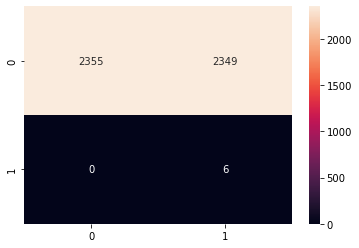

In [49]:
#Matriz de confusão dados de treino
pred_treino_RN1 = rede_neural1.predict(x_smote) 
cm = confusion_matrix(pred_treino_RN1,y_smote)
sns.heatmap(cm,annot=True,fmt='d');

In [50]:
#Metricas dos dados de treino
from sklearn.metrics import classification_report
print(classification_report(pred_treino_RN1,y_smote))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67      4704
           1       0.00      1.00      0.01         6

    accuracy                           0.50      4710
   macro avg       0.50      0.75      0.34      4710
weighted avg       1.00      0.50      0.67      4710



<AxesSubplot:>

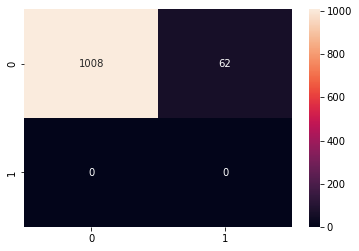

In [51]:
#Matriz de confusão dados de teste
pred_teste_RN1 = rede_neural1.predict(X_teste) 
cm = confusion_matrix(pred_teste_RN1,Y_teste)
sns.heatmap(cm,annot=True,fmt='d')

In [62]:
#Metricas dos dados de teste
print(classification_report(pred_teste_RN1,Y_teste))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1070
           1       0.00      0.00      0.00         0

    accuracy                           0.94      1070
   macro avg       0.50      0.47      0.49      1070
weighted avg       1.00      0.94      0.97      1070



In [63]:
#Recall
a = round(recall_score(pred_treino_RN1,y_smote),2)
b = round(recall_score(pred_teste_RN1,Y_teste),2)
c = [a,b]
recall['R_Neural_1'] = c
recall

,R_Logistica,R_Forest,R_Neural_1,R_Neural_2
Treino,0.86,1.00,1.0,1.0
Teste,0.15,0.29,0.0,0.0


**Apesar das Redes Neurais normalmente terem um bom desempenho em relação aos algoritimos de machine learning, neste caso o desempenho nos dados de teste foi muito abaixo comparado com o algoritimo Random Forest, não acertando nenhum resultado dos pacientes que sofreram de AVC**

# Modelo 4 - Redes Neurais - MLPClassifier

## Otimizando o algoritimo

In [54]:
#Separar as variaveis em treino e teste
import warnings
warnings.filterwarnings('ignore')
X_treino,X_teste,Y_treino,Y_teste=train_test_split(x_ref,y,test_size=0.3,random_state=1)


#Otimizção 
score = 0.8
r = ['identity', 'logistic', 'tanh', 'relu']
p = ['lbfgs', 'sgd', 'adam']
q = ['constant', 'invscaling', 'adaptive']
for i in r:
    for u in p:
        for e in q:
            try:
                rede_neural_2 = MLPClassifier(max_iter=500, verbose=False, tol=0.0000100,
                                                   solver = u, activation = i,
                                                   hidden_layer_sizes = (50,50),learning_rate=e,random_state=1)
                rede_neural_2.fit(X_treino, Y_treino)
                
                if rede_neural_2.score(X_treino, Y_treino) > score:
                    melhor_fit = rede_neural_2.fit(X_treino, Y_treino)
                    score = rede_neural_2.score(X_treino, Y_treino)
                    
                    print(score)
                    
            except: continue
         

0.9438877755511023
0.944689378757515


<AxesSubplot:>

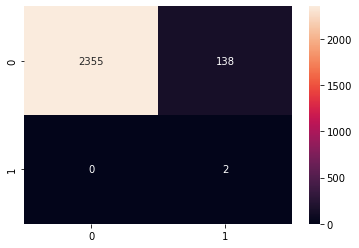

In [55]:
#Matriz de confusão dados de treino
pred_treino_RN2 = melhor_fit.predict(X_treino) 
cm = confusion_matrix(pred_treino_RN2,Y_treino)
sns.heatmap(cm,annot=True,fmt='d')

In [56]:
#Metricas dos dados de treino
from sklearn.metrics import classification_report
print(classification_report(pred_treino_RN2,Y_treino))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2493
           1       0.01      1.00      0.03         2

    accuracy                           0.94      2495
   macro avg       0.51      0.97      0.50      2495
weighted avg       1.00      0.94      0.97      2495



<AxesSubplot:>

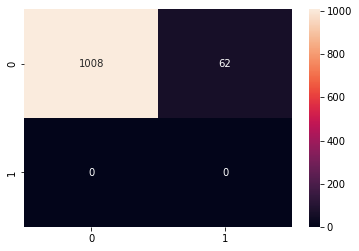

In [57]:
#Matriz de confusão dados de teste
pred_teste_RN2 = melhor_fit.predict(X_teste) 
cm = confusion_matrix(pred_teste_RN2,Y_teste)
sns.heatmap(cm,annot=True,fmt='d')

In [58]:
#Metricas dos dados de teste
from sklearn.metrics import classification_report
print(classification_report(pred_teste_RN2,Y_teste))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1070
           1       0.00      0.00      0.00         0

    accuracy                           0.94      1070
   macro avg       0.50      0.47      0.49      1070
weighted avg       1.00      0.94      0.97      1070



**Apesar de usar varios hiperparâmetros para ter o melhor resultado, o algoritimo praticamente manteve o mesmo resultado do modelo 3, no qual foi usado o mesmo algoritimo**

# Comparação do recall de todos os modelos

In [59]:
#Recall
a = round(recall_score(pred_treino_RN2,Y_treino),2)
b = round(recall_score(pred_teste_RN2,Y_teste),2)
c = [a,b]
recall['R_Neural_2'] = c
recall = recall.T
recall.columns = ['Treino','Teste']
recall = recall.T
recall

,R_Logistica,R_Forest,R_Neural_1,R_Neural_2
Treino,0.86,1.00,1.0,1.0
Teste,0.15,0.29,0.0,0.0


**Conseguimos perceber que em todos os modelos houve overfitting, apesar do modelo Random Forest ter uma melhor performance no recall nos dados de teste do que com os outros algoritimos, não podemos levar em consideração, pois ele previu muito poucos dados da classe 1, não sendo significante para um diagnóstico mais detalhado**

# Conclusão

**Nesse mini-projeto tivemos 2 objetivos, o primeiro foi através de uma analise exploratória, selecionar as variáveis do dataset mais relevante para encontrar pacientes que já sofreram de AVC, e o segundo objetivo foi através dessas variáveis selecionadas criar alguns modelos para previsão da classe 1 (AVC), mesmo com todas as análises feitas, nenhum modelo conseguiu performar bem, é fato que faltam variáveis mais relevantes para melhorar o resultado em geral, porém o fato do algoritimo ter um péssimo desempenho significa que toda analise exploratória feita não deve ser considerada?, até que ponto uma análise feita com bons insights pode fazer mais sentido que o resultado de um algoritimo?, nesse caso percebemos que algumas variáveis tem relação direta para um paciente sofrer AVC, mais nenhuma dessas variáveis foi capaz de gerar bons resultado para os algoritimo.**

**OBS: Poderíamos tentar outros algoritimos e mesclar as variáveis para chegar em um melhor resultado**